In [7]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from copy import deepcopy
import math
import random
from fractions import Fraction

In [8]:
def create_bar_plot(data_dict):
    categories = data_dict.keys()
    valuesdict = data_dict.copy()
    values = [v for v in valuesdict.values()]
    for index, value in enumerate(values):
        values[index] = round(value, 4)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(categories, values, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    ax.set_xlabel('Measured States', fontsize=12, fontweight='bold')
    ax.set_ylabel('Probability', fontsize=12, fontweight='bold')
    ax.set_title("Shor's Algorithm - Quantum Period Finding Results", fontsize=14, fontweight='bold')
    ax.set_ylim(0, max(values) * 1.1 if values else 1)
    
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + max(values) * 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    return fig, ax

=== SHOR'S ALGORITHM DEMONSTRATION ===

Attempting to factor N = 21
Note: This is a simplified demonstration.
Real Shor's algorithm requires more sophisticated
quantum circuits for modular arithmetic.

=== CLASSICAL VERIFICATION ===
Classical period finding: a = 7, period = None

=== QUANTUM ALGORITHM ===
=== SHOR'S ALGORITHM ===

Factoring N = 21
Classical preprocessing for N = 21
N requires quantum period finding
Quantum setup: 10 counting qubits, 5 auxiliary qubits

--- Attempt 1 ---
Chosen random a = 10 (gcd(a, N) = 1)
Running quantum period finding...
Analyzing measurement results...
Top measurements:
  0000000000 (0) -> fraction ≈ 0.0000, count: 1024
No valid periods found, trying again...

--- Attempt 2 ---
Chosen random a = 20 (gcd(a, N) = 1)
Running quantum period finding...
Analyzing measurement results...
Top measurements:
  0000000000 (0) -> fraction ≈ 0.0000, count: 1024
No valid periods found, trying again...

--- Attempt 3 ---
Chosen random a = 10 (gcd(a, N) = 1)
Running

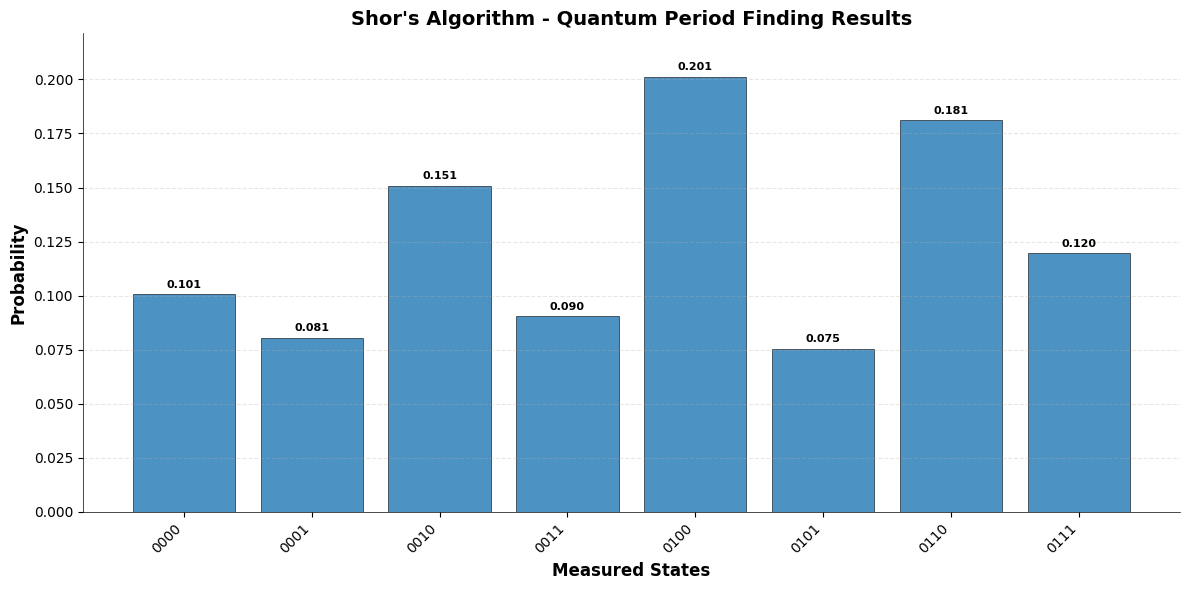


Factorization result: [3, 7]


In [ ]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def mod_exp(base, exponent, modulus):
    result = 1
    base = base % modulus
    while exponent > 0:
        if exponent % 2 == 1:
            result = (result * base) % modulus
        exponent = exponent >> 1
        base = (base * base) % modulus
    return result

def find_period_classical(a, N):
    period = 1
    current = a % N
    while current != 1:
        current = (current * a) % N
        period += 1
        if period > N:
            return None
    return period

class ShorAlgorithm:    
    def __init__(self, N):
        self.N = N
        self.n_count = None
        self.n_aux = None
        
    def classical_preprocessing(self):
        print(f"Classical preprocessing for N = {self.N}")
        
        if self.N % 2 == 0:
            print(f"N is even. Factor found: 2")
            return [2, self.N // 2]
        
        for k in range(2, int(np.log2(self.N)) + 1):
            root = round(self.N ** (1/k))
            if root ** k == self.N:
                print(f"N is a perfect {k}th power. Root: {root}")
                return self.factorize_recursive(root) * k
        
        if self.is_prime_simple(self.N):
            print(f"N = {self.N} is prime")
            return [self.N]
        
        print("N requires quantum period finding")
        return None
    
    def is_prime_simple(self, n):
        if n < 2:
            return False
        for i in range(2, int(np.sqrt(n)) + 1):
            if n % i == 0:
                return False
        return True
    
    def choose_random_a(self):
        while True:
            a = random.randint(2, self.N - 1)
            if gcd(a, self.N) == 1:
                print(f"Chosen random a = {a} (gcd(a, N) = 1)")
                return a
            else:
                factor = gcd(a, self.N)
                print(f"Lucky! Found factor during random selection: {factor}")
                return None, factor
    
    def setup_quantum_registers(self):
        self.n_aux = int(np.ceil(np.log2(self.N)))
        self.n_count = 2 * self.n_aux 
        
        print(f"Quantum setup: {self.n_count} counting qubits, {self.n_aux} auxiliary qubits")
        
    def create_qft(self, n_qubits):
        qft = QuantumCircuit(n_qubits, name='QFT')
        
        for i in range(n_qubits):
            qft.h(i)
            for j in range(i + 1, n_qubits):
                angle = 2 * np.pi / (2 ** (j - i + 1))
                qft.cp(angle, j, i)
        
        for i in range(n_qubits // 2):
            qft.swap(i, n_qubits - 1 - i)
        
        return qft
    
    def create_inverse_qft(self, n_qubits):
        iqft = self.create_qft(n_qubits).inverse()
        iqft.name = 'IQFT'
        return iqft
    
    def create_controlled_unitary(self, a, power):
        """
        Create controlled unitary U^(2^power) where U|y⟩ = |ay mod N⟩
        This is simplified for demonstration - real implementation would need
        more sophisticated modular arithmetic circuits
        """
        n_qubits = self.n_aux
        cu = QuantumCircuit(n_qubits, name=f'CU^{2**power}')
        
        # This is a simplified placeholder for the controlled modular exponentiation
        # In a real implementation, this would be a complex circuit implementing
        # modular multiplication by a^(2^power) mod N
        if self.N <= 8:
            for i in range(n_qubits):
                if power % 2 == 1:
                    cu.x(i)
        
        return cu
    
    def create_period_finding_circuit(self, a):
        counting_qreg = QuantumRegister(self.n_count, 'counting')
        aux_qreg = QuantumRegister(self.n_aux, 'auxiliary')
        creg = ClassicalRegister(self.n_count, 'classical')
        
        circuit = QuantumCircuit(counting_qreg, aux_qreg, creg)
        
        circuit.h(counting_qreg)
        
        circuit.x(aux_qreg[0])
        circuit.barrier()
        
        for i in range(self.n_count):
            cu = self.create_controlled_unitary(a, i)
            if i % 2 == 0:
                circuit.compose(cu, aux_qreg, inplace=True)
        
        circuit.barrier()
        
        iqft = self.create_inverse_qft(self.n_count)
        circuit.compose(iqft, counting_qreg, inplace=True)
        circuit.barrier()
        
        circuit.measure(counting_qreg, creg)
        
        return circuit
    
    def run_period_finding(self, a, shots=1024):
        circuit = self.create_period_finding_circuit(a)
        
        simulator = AerSimulator()
        
        pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)
        transpiled_circuit = pm.run(circuit)
        
        job = simulator.run(transpiled_circuit, shots=shots)
        result = job.result()
        counts = result.get_counts()
        
        return circuit, counts
    
    def extract_period_from_measurements(self, counts):
        print("Analyzing measurement results...")
        
        measurements = []
        for bitstring, count in counts.items():
            measurement = int(bitstring, 2)
            measurements.extend([measurement] * count)
        
        unique_measurements = list(set(measurements))
        measurement_counts = [(m, measurements.count(m)) for m in unique_measurements]
        measurement_counts.sort(key=lambda x: x[1], reverse=True)
        
        print("Top measurements:")
        for m, count in measurement_counts[:5]:
            fraction = m / (2 ** self.n_count)
            print(f"  {m:0{self.n_count}b} ({m}) -> fraction ≈ {fraction:.4f}, count: {count}")
        
        periods_found = []
        for m, count in measurement_counts[:5]:
            if m == 0:
                continue
            
            fraction = m / (2 ** self.n_count)
            frac = Fraction(fraction).limit_denominator(self.N)
            
            potential_period = frac.denominator
            if potential_period > 1 and potential_period < self.N:
                periods_found.append(potential_period)
                print(f"  Potential period from continued fraction: {potential_period}")
        
        return periods_found
    
    def verify_and_extract_factors(self, a, periods):
        """
        Step 7: Verify periods and extract factors
        """
        print(f"Verifying periods for a = {a}, N = {self.N}")
        
        for r in periods:
            print(f"Testing period r = {r}")
            
            if mod_exp(a, r, self.N) != 1:
                print(f"  Period {r} doesn't satisfy a^r ≡ 1 (mod N)")
                continue
            
            if r % 2 != 0:
                print(f"  Period {r} is odd, cannot use for factorization")
                continue
            
            factor1 = gcd(mod_exp(a, r // 2, self.N) - 1, self.N)
            factor2 = gcd(mod_exp(a, r // 2, self.N) + 1, self.N)
            
            print(f"  a^(r/2) mod N = {mod_exp(a, r // 2, self.N)}")
            print(f"  gcd(a^(r/2) - 1, N) = {factor1}")
            print(f"  gcd(a^(r/2) + 1, N) = {factor2}")
            
            factors = []
            if 1 < factor1 < self.N:
                factors.append(factor1)
            if 1 < factor2 < self.N and factor2 != factor1:
                factors.append(factor2)
            
            if factors:
                print(f"SUCCESS! Found factors: {factors}")
                return factors, r
        
        print("No valid factors found from these periods")
        return None, None
    
    def run_complete_algorithm(self, shots=1024):
        """
        Run the complete Shor's algorithm
        """
        print("=== SHOR'S ALGORITHM ===\n")
        print(f"Factoring N = {self.N}")
        
        classical_result = self.classical_preprocessing()
        if classical_result:
            return classical_result
        
        self.setup_quantum_registers()
        
        max_attempts = 5
        for attempt in range(max_attempts):
            print(f"\n--- Attempt {attempt + 1} ---")
            
            result = self.choose_random_a()
            # if isinstance(result, tuple):
            #     return result[1]
            a = result
            
            print("Running quantum period finding...")
            circuit, counts = self.run_period_finding(a, shots)
            
            periods = self.extract_period_from_measurements(counts)
            
            if not periods:
                print("No valid periods found, trying again...")
                continue
            
            factors, period = self.verify_and_extract_factors(a, periods)
            
            if factors:
                all_factors = factors + [self.N // factors[0]]
                return all_factors, period, circuit, counts
        
        print(f"Failed to find factors after {max_attempts} attempts")
        return None

def demonstrate_shor():
    print("=== SHOR'S ALGORITHM DEMONSTRATION ===\n")
    
    N = 21
    
    print(f"Attempting to factor N = {N}")
    print("Note: This is a simplified demonstration.")
    print("Real Shor's algorithm requires more sophisticated")
    print("quantum circuits for modular arithmetic.\n")
    
    shor = ShorAlgorithm(N)
    
    print("=== CLASSICAL VERIFICATION ===")
    a = 7
    classical_period = find_period_classical(a, N)
    print(f"Classical period finding: a = {a}, period = {classical_period}")
    
    if classical_period and classical_period % 2 == 0:
        factor1 = gcd(mod_exp(a, classical_period // 2, N) - 1, N)
        factor2 = gcd(mod_exp(a, classical_period // 2, N) + 1, N)
        print(f"Classical factorization result: {factor1} × {factor2} = {factor1 * factor2}")
    
    print("\n=== QUANTUM ALGORITHM ===")
    
    result = shor.run_complete_algorithm(shots=1024)
    if result and isinstance(result, tuple) and len(result) >= 2:
        factors, period, circuit, counts = result[0], result[1], result[2], result[3]
        print(f"\nFinal Result:")
        print(f"Factors found: {factors}")
        print(f"Period used: {period}")
        
        if len(factors) >= 2:
            product = factors[0] * factors[1]
            print(f"Verification: {factors[0]} × {factors[1]} = {product}")
            print(f"Correct: {product == N}")
        
        return circuit, counts, factors
    else:
        print("Quantum algorithm failed")

if __name__ == "__main__":
    circuit, counts, factors = demonstrate_shor()
    
    print("\nCreating visualization...")
    
    total_counts = sum(counts.values())
    probabilities = {state: count/total_counts for state, count in counts.items()}
    
    fig, ax = create_bar_plot(probabilities)
    plt.show()
    
    plot_histogram(counts, title="Shor's Algorithm - Quantum Period Finding Results")
    plt.show()
    
    if circuit:
        print(f"\nQuantum circuit depth: {circuit.depth()}")
        print(f"Quantum circuit width: {circuit.width()}")
    
    print(f"\nFactorization result: {factors}")